# 3. Plotting for Exploratory data analysis (EDA)-HABERMAN

Haberman dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

Attribute Information:

1.Age of patient at time of operation (numerical)
2.Patient's year of operation (year - 1900, numerical)
3.Number of positive axillary nodes detected (numerical)
4.Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")



In [2]:
print(haberman.shape)

(306, 4)


In [3]:
haberman.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print(haberman.columns)
#columns in our dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
haberman['status'].value_counts()
#1 = the patient survived 5 years or longer
#2 = the patient died within 5 year

1    225
2     81
Name: status, dtype: int64

observations:<br>
<br>The dataset contains 306 rows (instances) and 4 columns(attributes)
<br>The 4 columns are 'age', 'year', 'nodes', 'status'each of type object
<br>Total no of people who survived 5 years or longer is 225 and those who did not is 81


In [6]:
print(haberman.info())
#a summary of infos on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


observations:
<br>the range of entries is from 0 to 305
<br>all 4 attributes are non-null, ie, there are no null values in the entries
<br>all entries are of type integer(int64)
<br>total memory used is 9.6KB

# 2-D Scatter Plot

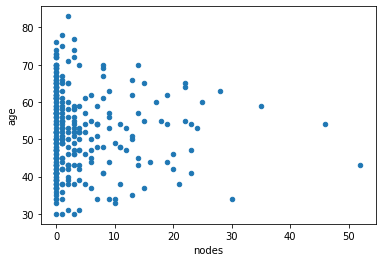

In [7]:
#2-D scatter plot:

haberman.plot(kind='scatter', x='nodes', y='age') ;
plt.show()

#we are plotting a nodes vs age graph

observations:
    <br>we cannot say anything from the above as there is no differentiator between the status
    <br>so we need to apply different colors through seaborn

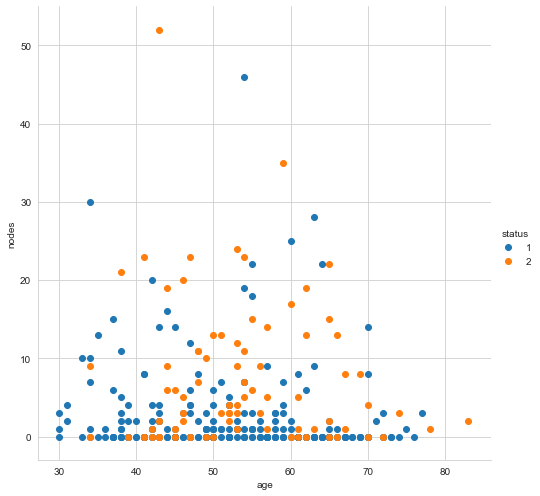

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=7) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();
#status is survival status, 


In [10]:
%%markdown
observations:
    
<br>1.Here there is no clear linearly separating plane , ie, the 2 different status are not linearly separable
<br>2.we classify based on the hue(status),
<br>3.with 0 nodes, more patients are likely to survive irrespective of the age
<br>4.there are very less people(close to 4) with more than 30 nodes


observations:
    
<br>1.Here there is no clear linearly separating plane , ie, the 2 different status are not linearly separable
<br>2.we classify based on the hue(status),
<br>3.with 0 nodes, more patients are likely to survive irrespective of the age
<br>4.there are very less people(close to 4) with more than 30 nodes


# Univariate analysis

## 1.Pdf(probability density function)

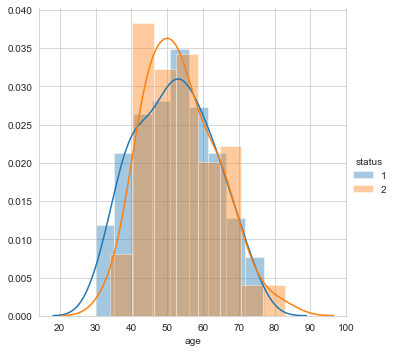

In [11]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

observations:
<br>from the above , using age alone we cannot really say much as its all overlapping

USING YEAR OF OPERATION:

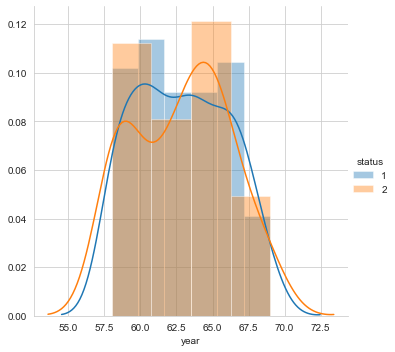

In [16]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

observations:
<br>from the above , using year we cannot really say much as its all overlapping

USING NO.OF AUXILLARY NODES:

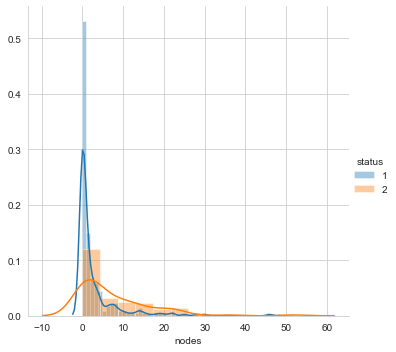

In [17]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

Observation:
<br>using the above , we can say that those with lesser nodes have a higher survival rate, so we choose nodes as the main attribute that contributes most information about our output 'status' , so we can say 'nodes' is a significant variable

### CDF

In [12]:
hab_1 = haberman.loc[haberman["status"] == 1];
hab_2 = haberman.loc[haberman["status"] == 2];


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


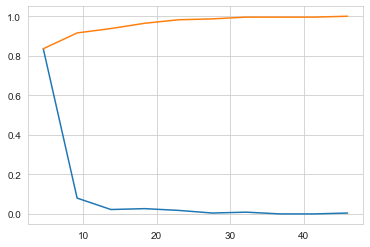

In [22]:
counts, bin_edges = np.histogram(hab_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

In the above : we can see about 82% (approx ) of the people who are in status 1 have less than 5 nodes or so, that means those with lesser nodes have a higher chance of survival

## BoxPlot and Violin Plot



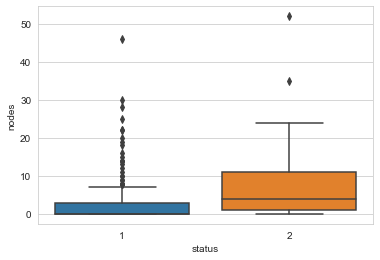

In [16]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

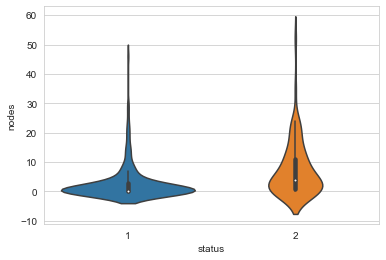

In [18]:
sns.violinplot(x='status',y='nodes', data=haberman,height = 10)
plt.show()

OBSERVATIONS: 
<br> Patients with more nodes are less likely to survive
<br>A large percentage of patients who survived had 0 nodes, 



## PAIR PLOT

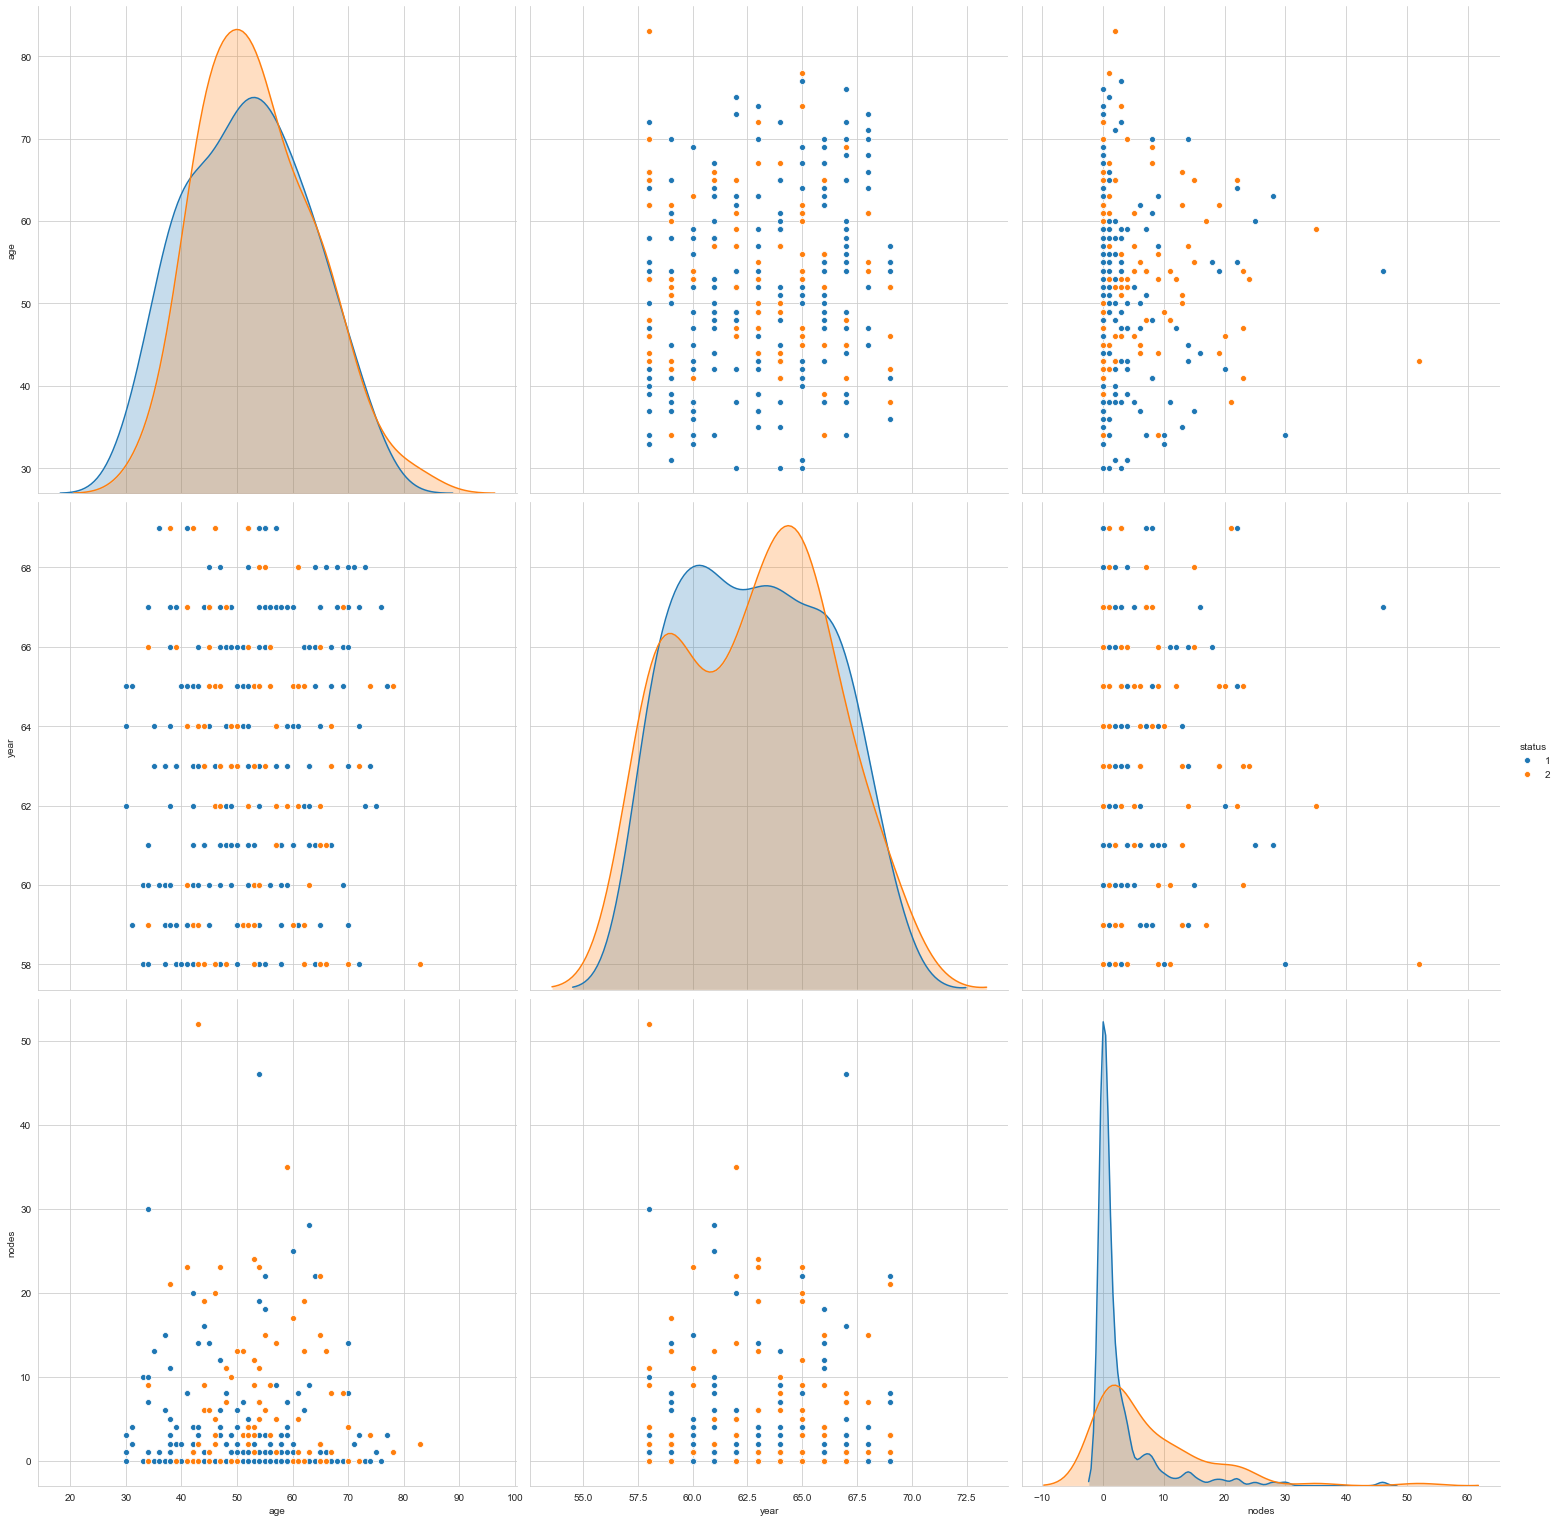

In [21]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='status', height = 7)
plt.show()

The plot between year and nodes is relatively better.



##Conclusions:


Patient’s age and operation year alone are not deciding factors for his/her survival.
<br>Survivale is inversely proportional to the number of axillary nodes. 
<br>The objective of classifying the survival status of a new patient based on the given features is a difficult task as the <br>data is imbalanced.
<br>Absence id nodes cannot guarantee survival too